In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-fraud-detection-dataset-2023/creditcard_2023.csv
/kaggle/input/creditcardfraud/creditcard.csv
/kaggle/input/credit-card-fraud/card_transdata.csv


In [2]:
import numpy as np
import pandas as pd

dataset_path1 = '/kaggle/input/creditcardfraud/creditcard.csv'# Update with your dataset path
df = pd.read_csv(dataset_path1)

print(df)


            Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.01830

In [3]:
fraud_data = df[df['Class'] == 1]
not_fraud_data = df[df['Class'] == 0]

fraud_size = 400

# Randomly sample a subset of fraud data
fraud_data_sampled = fraud_data.sample(n=fraud_size, random_state=42)

nonfraud_size = 14000
# Randomly sample a subset of not fraud data
not_fraud_data_sampled = not_fraud_data.sample(n=nonfraud_size, random_state=42)

# Concatenate fraud and sampled not fraud data to create a partially balanced dataset
balanced_df = pd.concat([fraud_data_sampled, not_fraud_data_sampled])

# Shuffle the dataset
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

print(balanced_df)

           Time        V1        V2        V3        V4        V5        V6  \
0       88729.0  1.775081  0.024814 -0.298319  3.485230  0.206841  1.029062   
1      152601.0  2.073789 -0.116198 -1.144069  0.389792 -0.151251 -1.151230   
2       80491.0 -0.889680  0.507635  2.856122  3.123872 -0.422746  2.014474   
3      168127.0  2.140718 -1.681938 -0.937464 -1.717303 -1.134333  0.152518   
4       65319.0 -0.871285  0.580954  2.260900 -0.248957 -0.316936 -0.110956   
...         ...       ...       ...       ...       ...       ...       ...   
14395  136347.0  1.890249  0.561095 -1.586741  3.535973  0.986080 -0.177919   
14396   34767.0  1.111521 -0.158526  0.446614  0.743302 -0.328328  0.046595   
14397   43922.0  0.684618 -0.957420  0.584820  0.669102 -0.742233  0.743570   
14398  151910.0  1.964684  0.110489 -1.556442  1.307862  0.376046 -0.886383   
14399   31816.0  1.467985 -1.054200  0.673330 -1.333963 -1.710516 -0.876843   

             V7        V8        V9  ...       V21 

In [4]:
total_null_values = balanced_df.isna().sum()
print("Total Null Values:", total_null_values)

Total Null Values: Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [5]:
total_duplicates = balanced_df.duplicated().sum()
print("Total Duplicates:", total_duplicates)

Total Duplicates: 16


In [6]:
balanced_df.drop_duplicates(inplace=True)
print(balanced_df)

           Time        V1        V2        V3        V4        V5        V6  \
0       88729.0  1.775081  0.024814 -0.298319  3.485230  0.206841  1.029062   
1      152601.0  2.073789 -0.116198 -1.144069  0.389792 -0.151251 -1.151230   
2       80491.0 -0.889680  0.507635  2.856122  3.123872 -0.422746  2.014474   
3      168127.0  2.140718 -1.681938 -0.937464 -1.717303 -1.134333  0.152518   
4       65319.0 -0.871285  0.580954  2.260900 -0.248957 -0.316936 -0.110956   
...         ...       ...       ...       ...       ...       ...       ...   
14395  136347.0  1.890249  0.561095 -1.586741  3.535973  0.986080 -0.177919   
14396   34767.0  1.111521 -0.158526  0.446614  0.743302 -0.328328  0.046595   
14397   43922.0  0.684618 -0.957420  0.584820  0.669102 -0.742233  0.743570   
14398  151910.0  1.964684  0.110489 -1.556442  1.307862  0.376046 -0.886383   
14399   31816.0  1.467985 -1.054200  0.673330 -1.333963 -1.710516 -0.876843   

             V7        V8        V9  ...       V21 

In [7]:
description=balanced_df.describe()
print(description)

                Time            V1            V2            V3            V4  \
count   14384.000000  14384.000000  14384.000000  14384.000000  14384.000000   
mean    94733.832870     -0.099205      0.085352     -0.179362      0.107339   
std     47487.984261      2.271766      1.787920      2.082457      1.612197   
min         0.000000    -30.515455    -32.494845    -30.558697     -4.938824   
25%     54376.750000     -0.947784     -0.590767     -1.002975     -0.816434   
50%     85014.000000      0.010518      0.084272      0.125815      0.020346   
75%    139156.500000      1.306772      0.854113      0.988118      0.815875   
max    172768.000000      2.398119     22.057729      3.770236     11.864868   

                 V5            V6            V7            V8            V9  \
count  14384.000000  14384.000000  14384.000000  14384.000000  14384.000000   
mean      -0.056863     -0.044164     -0.139763      0.032526     -0.042171   
std        1.629241      1.355501      1.7

In [8]:
class_counts = balanced_df['Class'].value_counts()
print("Class Distribution:")
print(class_counts)

Class Distribution:
Class
0    13998
1      386
Name: count, dtype: int64


In [9]:
X = balanced_df.drop(["Class"], axis=1)
Y = balanced_df["Class"]

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

dt_model = DecisionTreeClassifier(random_state=3)

# Train the model on the training data
dt_model.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = dt_model.predict(X_test)

In [12]:
# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
classification_report_result = classification_report(Y_test, Y_pred)
confusion_matrix_result = confusion_matrix(Y_test, Y_pred)

# Print the results
print(f"Accuracy Score: {accuracy}")
print("\nClassification Report:")
print(classification_report_result)
print("\nConfusion Matrix:")
print(confusion_matrix_result)

Accuracy Score: 0.9895724713242962

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2802
           1       0.80      0.80      0.80        75

    accuracy                           0.99      2877
   macro avg       0.90      0.90      0.90      2877
weighted avg       0.99      0.99      0.99      2877


Confusion Matrix:
[[2787   15]
 [  15   60]]


In [13]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

svm_model=SVC()


In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_model.fit(X_train_scaled, Y_train)

pred = svm_model.predict(X_test_scaled)

print("Accuracy Score: ", accuracy_score(Y_test, pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, pred))
print("Classification Report:\n", classification_report(Y_test, pred))



Accuracy Score:  0.992005561348627
Confusion Matrix:
 [[2801    1]
 [  22   53]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      2802
           1       0.98      0.71      0.82        75

    accuracy                           0.99      2877
   macro avg       0.99      0.85      0.91      2877
weighted avg       0.99      0.99      0.99      2877



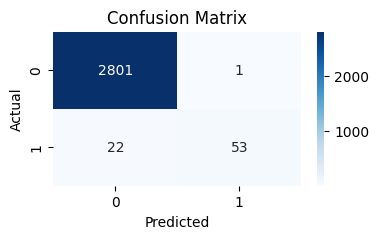

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(Y_test, pred)
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=svm_model.classes_, yticklabels=svm_model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [16]:
dataset_path2 = '/kaggle/input/credit-card-fraud-detection-dataset-2023/creditcard_2023.csv'# Update with your dataset path
df = pd.read_csv(dataset_path2)

print(df)

            id        V1        V2        V3        V4        V5        V6  \
0            0 -0.260648 -0.469648  2.496266 -0.083724  0.129681  0.732898   
1            1  0.985100 -0.356045  0.558056 -0.429654  0.277140  0.428605   
2            2 -0.260272 -0.949385  1.728538 -0.457986  0.074062  1.419481   
3            3 -0.152152 -0.508959  1.746840 -1.090178  0.249486  1.143312   
4            4 -0.206820 -0.165280  1.527053 -0.448293  0.106125  0.530549   
...        ...       ...       ...       ...       ...       ...       ...   
568625  568625 -0.833437  0.061886 -0.899794  0.904227 -1.002401  0.481454   
568626  568626 -0.670459 -0.202896 -0.068129 -0.267328 -0.133660  0.237148   
568627  568627 -0.311997 -0.004095  0.137526 -0.035893 -0.042291  0.121098   
568628  568628  0.636871 -0.516970 -0.300889 -0.144480  0.131042 -0.294148   
568629  568629 -0.795144  0.433236 -0.649140  0.374732 -0.244976 -0.603493   

              V7        V8        V9  ...       V21       V22  

In [17]:
# Separate data into fraud and not fraud
fraud_data = df[df['Class'] == 1]
not_fraud_data = df[df['Class'] == 0]

fraud_size = 4000 

# Randomly sample a subset of fraud data
fraud_data_sampled = fraud_data.sample(n=fraud_size, random_state=42)

nonfraud_size = 11000
# Randomly sample a subset of not fraud data
not_fraud_data_sampled = not_fraud_data.sample(n=nonfraud_size, random_state=42)

# Concatenate fraud and sampled not fraud data to create a partially balanced dataset
balanced_df = pd.concat([fraud_data_sampled, not_fraud_data_sampled])

your_feature = 'id'
feature_series = df[your_feature]

# Reset the index for the feature
feature_series_reset = feature_series.reset_index(drop=True)

# Shuffle the dataset
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)
balanced_df[your_feature] = feature_series_reset

print(balanced_df)

          id        V1        V2        V3        V4        V5        V6  \
0          0  1.649630 -0.768908  0.083791 -0.957894  0.861870  2.540980   
1          1 -0.270852 -0.266564  1.198016  0.199319  1.779212  0.497062   
2          2  1.824471 -0.315163 -0.584480 -0.781332  2.284680  1.735121   
3          3 -0.431323 -0.140438 -0.266495 -0.047924 -0.751208  0.967540   
4          4  1.001507 -0.393355  0.619691 -0.369563  0.075739 -0.002063   
...      ...       ...       ...       ...       ...       ...       ...   
14995  14995  1.622485 -0.621083 -0.083808 -0.422964  1.323428  2.524770   
14996  14996 -0.073170 -0.204650  0.776836 -0.655616  1.616048  2.737970   
14997  14997  1.594432 -0.519362  0.181239 -0.059634  0.304859  0.684824   
14998  14998  0.300123 -0.165475  1.658488  0.407091  0.058204  1.167922   
14999  14999  0.962208 -0.519091  0.717963 -0.543808 -0.038885 -0.177372   

             V7        V8        V9  ...       V21       V22       V23  \
0     -0.0325

In [18]:
balanced_df.drop(your_feature, axis=1, inplace=True)
print(balanced_df)

             V1        V2        V3        V4        V5        V6        V7  \
0      1.649630 -0.768908  0.083791 -0.957894  0.861870  2.540980 -0.032549   
1     -0.270852 -0.266564  1.198016  0.199319  1.779212  0.497062  0.896801   
2      1.824471 -0.315163 -0.584480 -0.781332  2.284680  1.735121  0.511871   
3     -0.431323 -0.140438 -0.266495 -0.047924 -0.751208  0.967540  1.252411   
4      1.001507 -0.393355  0.619691 -0.369563  0.075739 -0.002063  0.380900   
...         ...       ...       ...       ...       ...       ...       ...   
14995  1.622485 -0.621083 -0.083808 -0.422964  1.323428  2.524770  0.175715   
14996 -0.073170 -0.204650  0.776836 -0.655616  1.616048  2.737970  0.439679   
14997  1.594432 -0.519362  0.181239 -0.059634  0.304859  0.684824  0.393083   
14998  0.300123 -0.165475  1.658488  0.407091  0.058204  1.167922  0.066699   
14999  0.962208 -0.519091  0.717963 -0.543808 -0.038885 -0.177372  0.399206   

             V8        V9       V10  ...       V21 

In [19]:
total_null_values = balanced_df.isna().sum()
print("Total Null Values:", total_null_values)

Total Null Values: V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [20]:
total_duplicates = balanced_df.duplicated().sum()
print("Total Duplicates:", total_duplicates)

Total Duplicates: 0


In [21]:
balanced_df.drop_duplicates(inplace=True)
print(balanced_df)

             V1        V2        V3        V4        V5        V6        V7  \
0      1.649630 -0.768908  0.083791 -0.957894  0.861870  2.540980 -0.032549   
1     -0.270852 -0.266564  1.198016  0.199319  1.779212  0.497062  0.896801   
2      1.824471 -0.315163 -0.584480 -0.781332  2.284680  1.735121  0.511871   
3     -0.431323 -0.140438 -0.266495 -0.047924 -0.751208  0.967540  1.252411   
4      1.001507 -0.393355  0.619691 -0.369563  0.075739 -0.002063  0.380900   
...         ...       ...       ...       ...       ...       ...       ...   
14995  1.622485 -0.621083 -0.083808 -0.422964  1.323428  2.524770  0.175715   
14996 -0.073170 -0.204650  0.776836 -0.655616  1.616048  2.737970  0.439679   
14997  1.594432 -0.519362  0.181239 -0.059634  0.304859  0.684824  0.393083   
14998  0.300123 -0.165475  1.658488  0.407091  0.058204  1.167922  0.066699   
14999  0.962208 -0.519091  0.717963 -0.543808 -0.038885 -0.177372  0.399206   

             V8        V9       V10  ...       V21 

In [22]:
description=balanced_df.describe()
print(description)

                 V1            V2            V3            V4            V5  \
count  15000.000000  15000.000000  15000.000000  15000.000000  15000.000000   
mean       0.237327     -0.229474      0.306925     -0.343349      0.164410   
std        0.957117      0.878156      0.933029      0.935795      0.898902   
min       -2.636127    -19.464020     -2.516968     -4.116263     -3.299044   
25%       -0.321313     -0.584901     -0.181293     -0.931291     -0.118467   
50%        0.040959     -0.308134      0.297546     -0.416640      0.169621   
75%        0.984673     -0.005889      0.875185      0.186509      0.494973   
max        2.164795      4.352364      3.989589      2.390767     32.538681   

                 V6            V7            V8            V9           V10  \
count  15000.000000  15000.000000  15000.000000  15000.000000  15000.000000   
mean       0.194870      0.226583     -0.054392      0.281411      0.318782   
std        0.914970      0.777260      0.749887    

In [23]:
class_counts = balanced_df['Class'].value_counts()
print("Class Distribution:")
print(class_counts)

Class Distribution:
Class
0    11000
1     4000
Name: count, dtype: int64


In [24]:
X = balanced_df.drop(["Class"], axis=1)
Y = balanced_df["Class"]

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

dt_model = DecisionTreeClassifier(random_state=3)

# Train the model on the training data
dt_model.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = dt_model.predict(X_test)

In [27]:
# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
classification_report_result = classification_report(Y_test, Y_pred)
confusion_matrix_result = confusion_matrix(Y_test, Y_pred)

# Print the results
print(f"Accuracy Score: {accuracy}")
print("\nClassification Report:")
print(classification_report_result)
print("\nConfusion Matrix:")
print(confusion_matrix_result)

Accuracy Score: 0.9746666666666667

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      2237
           1       0.94      0.96      0.95       763

    accuracy                           0.97      3000
   macro avg       0.96      0.97      0.97      3000
weighted avg       0.98      0.97      0.97      3000


Confusion Matrix:
[[2188   49]
 [  27  736]]


In [28]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

svm_model=SVC()


In [29]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_model.fit(X_train_scaled, Y_train)

pred = svm_model.predict(X_test_scaled)

print("Accuracy Score: ", accuracy_score(Y_test, pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, pred))
print("Classification Report:\n", classification_report(Y_test, pred))

Accuracy Score:  0.984
Confusion Matrix:
 [[2232    5]
 [  43  720]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      2237
           1       0.99      0.94      0.97       763

    accuracy                           0.98      3000
   macro avg       0.99      0.97      0.98      3000
weighted avg       0.98      0.98      0.98      3000



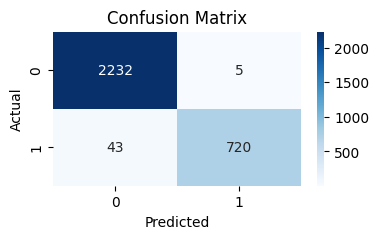

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(Y_test, pred)
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=svm_model.classes_, yticklabels=svm_model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [31]:
dataset_path3 = '/kaggle/input/credit-card-fraud/card_transdata.csv'# Update with your dataset path
df = pd.read_csv(dataset_path3)

print(df)

        distance_from_home  distance_from_last_transaction  \
0                57.877857                        0.311140   
1                10.829943                        0.175592   
2                 5.091079                        0.805153   
3                 2.247564                        5.600044   
4                44.190936                        0.566486   
...                    ...                             ...   
999995            2.207101                        0.112651   
999996           19.872726                        2.683904   
999997            2.914857                        1.472687   
999998            4.258729                        0.242023   
999999           58.108125                        0.318110   

        ratio_to_median_purchase_price  repeat_retailer  used_chip  \
0                             1.945940              1.0        1.0   
1                             1.294219              1.0        0.0   
2                             0.427715       

In [32]:
fraud_data = df[df['fraud'] == 1.0]
not_fraud_data = df[df['fraud'] == 0.0]

fraud_size = 3000 

# Randomly sample a subset of fraud data
fraud_data_sampled = fraud_data.sample(n=fraud_size, random_state=42)

nonfraud_size = 10500
# Randomly sample a subset of not fraud data
not_fraud_data_sampled = not_fraud_data.sample(n=nonfraud_size, random_state=42)

# Concatenate fraud and sampled not fraud data to create a partially balanced dataset
balanced_df = pd.concat([fraud_data_sampled, not_fraud_data_sampled])

# Shuffle the dataset
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Shuffle the dataset
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

print(balanced_df)

       distance_from_home  distance_from_last_transaction  \
0              112.196213                        0.519505   
1                1.528060                        8.016795   
2                0.945135                       19.667539   
3                4.967883                        0.655414   
4                1.539647                        9.851696   
...                   ...                             ...   
13495            2.283874                       13.568183   
13496            2.365638                        9.670175   
13497            3.650959                        0.864102   
13498            0.963339                        0.296959   
13499           20.862876                        6.693626   

       ratio_to_median_purchase_price  repeat_retailer  used_chip  \
0                            6.296167              1.0        0.0   
1                            0.744201              0.0        0.0   
2                            2.721887              0.0      

In [33]:
total_null_values = balanced_df.isna().sum()
print("Total Null Values:", total_null_values)

Total Null Values: distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64


In [34]:
total_duplicates = balanced_df.duplicated().sum()
print("Total Duplicates:", total_duplicates)

Total Duplicates: 0


In [35]:
balanced_df.drop_duplicates(inplace=True)
print(balanced_df)

       distance_from_home  distance_from_last_transaction  \
0              112.196213                        0.519505   
1                1.528060                        8.016795   
2                0.945135                       19.667539   
3                4.967883                        0.655414   
4                1.539647                        9.851696   
...                   ...                             ...   
13495            2.283874                       13.568183   
13496            2.365638                        9.670175   
13497            3.650959                        0.864102   
13498            0.963339                        0.296959   
13499           20.862876                        6.693626   

       ratio_to_median_purchase_price  repeat_retailer  used_chip  \
0                            6.296167              1.0        0.0   
1                            0.744201              0.0        0.0   
2                            2.721887              0.0      

In [36]:
description=balanced_df.describe()
print(description)

       distance_from_home  distance_from_last_transaction  \
count        13500.000000                    13500.000000   
mean            33.225840                        5.983725   
std             77.370600                       27.279253   
min              0.034267                        0.000676   
25%              4.000824                        0.297753   
50%             10.719665                        0.985215   
75%             29.663779                        3.466985   
max           2290.137093                     1872.446884   

       ratio_to_median_purchase_price  repeat_retailer     used_chip  \
count                    13500.000000     13500.000000  13500.000000   
mean                         2.471209         0.886815      0.338889   
std                          3.630707         0.316831      0.473350   
min                          0.016867         0.000000      0.000000   
25%                          0.538999         1.000000      0.000000   
50%               

In [37]:
class_counts = balanced_df['fraud'].value_counts()
print("Class Distribution:")
print(class_counts)

Class Distribution:
fraud
0.0    10500
1.0     3000
Name: count, dtype: int64


In [38]:
X = balanced_df.drop(["fraud"], axis=1)
Y = balanced_df["fraud"]

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

dt_model = DecisionTreeClassifier(random_state=3)

# Train the model on the training data
dt_model.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = dt_model.predict(X_test)

In [41]:
# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
classification_report_result = classification_report(Y_test, Y_pred)
confusion_matrix_result = confusion_matrix(Y_test, Y_pred)

# Print the results
print(f"Accuracy Score: {accuracy}")
print("\nClassification Report:")
print(classification_report_result)
print("\nConfusion Matrix:")
print(confusion_matrix_result)

Accuracy Score: 0.9985185185185185

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2097
         1.0       0.99      1.00      1.00       603

    accuracy                           1.00      2700
   macro avg       1.00      1.00      1.00      2700
weighted avg       1.00      1.00      1.00      2700


Confusion Matrix:
[[2093    4]
 [   0  603]]


In [42]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

svm_model=SVC()

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_model.fit(X_train_scaled, Y_train)

pred = svm_model.predict(X_test_scaled)

print("Accuracy Score: ", accuracy_score(Y_test, pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, pred))
print("Classification Report:\n", classification_report(Y_test, pred))

Accuracy Score:  0.9874074074074074
Confusion Matrix:
 [[2078   19]
 [  15  588]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      2097
         1.0       0.97      0.98      0.97       603

    accuracy                           0.99      2700
   macro avg       0.98      0.98      0.98      2700
weighted avg       0.99      0.99      0.99      2700



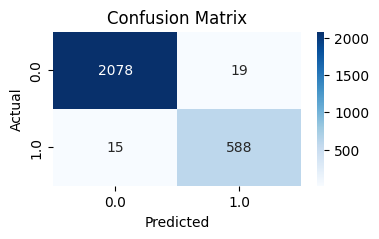

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(Y_test, pred)
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=svm_model.classes_, yticklabels=svm_model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()